# Step 1 : Import required python libraries

In [1]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Step 2: Import the dataset for employee attrition given by Company X

In [2]:
#importing dataset
excel_file = 'Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx'
left_emp = pd.read_excel(excel_file, sheet_name = 'Employees who have left')
exist_emp = pd.read_excel(excel_file, sheet_name = 'Existing employees')

In [3]:
left_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
exist_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [11]:
#adding attrition column for whether the employee left or not 
# 1 for the employees that left and 0 for the employees that still exist
left_emp['attrition'] = 1
exist_emp['attrition'] = 0

In [12]:
#concatenating the two dataset together by the rows to form 1 dataset
employee = pd.concat([left_emp, exist_emp], axis = 0)
employee.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Step 3: Data Analysis : Explorative Analysis And Visualizations

In [14]:
#renaming columns
employee.columns = employee.columns.str.strip().str.lower().str.replace(' ', '_')
employee.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [5]:
left_emp['salary'].value_counts() #count of employees that left based on their salary

low       2172
medium    1317
high        82
Name: salary, dtype: int64

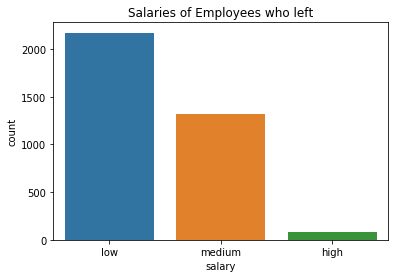

In [6]:
#salary countplot for employees that left
sns.countplot(left_emp['salary'])
plt.title('Salaries of Employees who left')
plt.savefig('salary_left plot.png', bbox_inches='tight')
plt.show()

#### Employees with low and medium salaries left the most

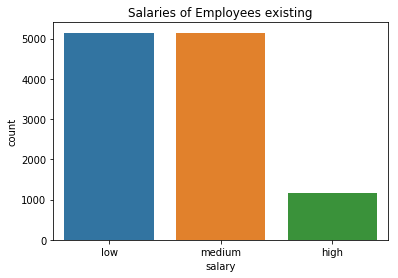

In [7]:
#salary countplot for employees existing
sns.countplot(exist_emp['salary'])
plt.title('Salaries of Employees existing')
plt.savefig('salary_exist plot.png', bbox_inches='tight')
plt.show()

#### Most of the existing employees have a low or medium salary

In [8]:
left_emp['dept'].value_counts() #count of employees that left based on their departments

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

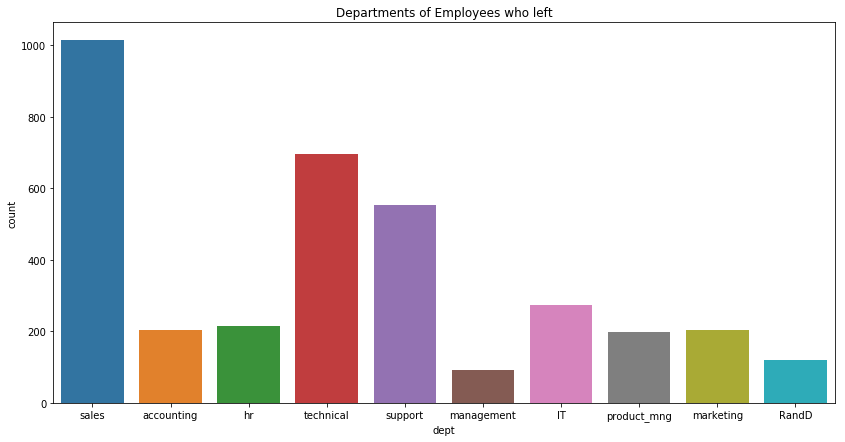

In [9]:
#department countplot for employees that left
plt.figure(figsize=(14,7))
sns.countplot(left_emp['dept'])
plt.title('Departments of Employees who left')
plt.savefig('dept_left plot.png', bbox_inches='tight')
plt.show()

#### Employees in sales, technical and support department left the most 
#### Management department employees were the least to leave

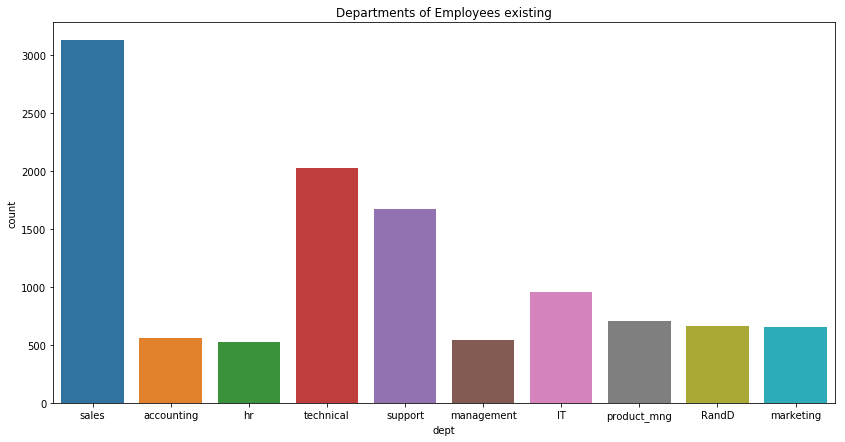

In [10]:
#deptartment countplot for employees existing
plt.figure(figsize=(14,7))
sns.countplot(exist_emp['dept'])
plt.title('Departments of Employees existing')
plt.savefig('dept_exist plot.png', bbox_inches='tight')
plt.show()

In [13]:
#description of columns and rows,the shape of the dataframe and their datatypes
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
attrition                14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


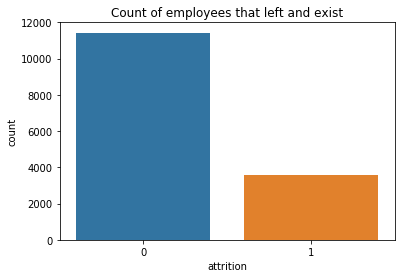

In [15]:
#Employyees by attrition status
sns.countplot(employee['attrition'])
plt.title('Count of employees that left and exist')
plt.savefig('Exist and non exist employees.png', bbox_inches='tight')

In [16]:
#percentage of exployeees that left and are existing
print(round((employee['attrition'].value_counts()/14999)*100,2)) 

0    76.19
1    23.81
Name: attrition, dtype: float64


### The percentage of employees that left is about 24%

In [17]:
#label encoding of the categorical features to numerical discrete values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
employee['salary']= le.fit_transform(employee['salary'])
employee['dept']= le.fit_transform(employee['dept'])
employee.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,7,1,1
1,2,0.80,0.86,5,262,6,0,0,7,2,1
2,3,0.11,0.88,7,272,4,0,0,7,2,1
3,4,0.72,0.87,5,223,5,0,0,7,1,1
4,5,0.37,0.52,2,159,3,0,0,7,1,1


salary: 
low = 1, 
medium =2, 
high = 0.


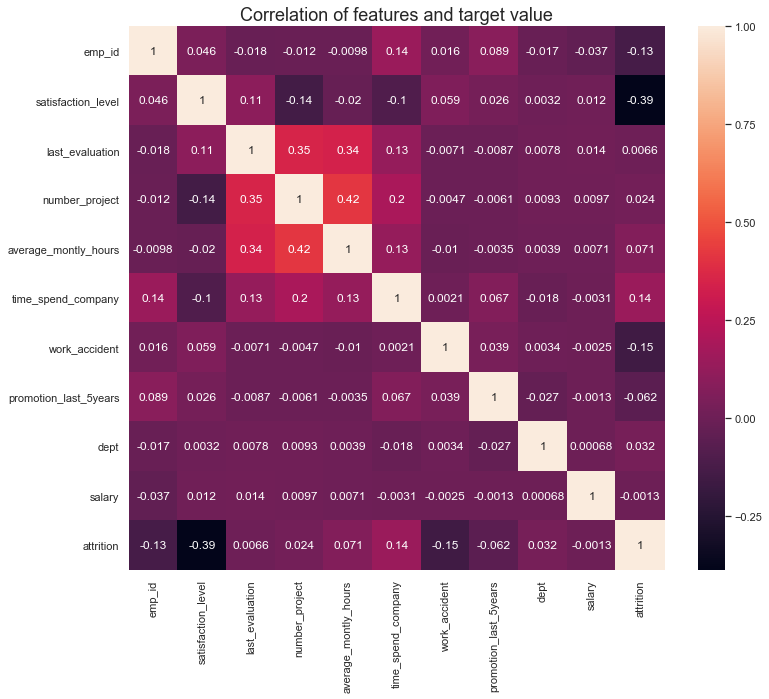

In [18]:
#visualization of the correlation between features and target value
sns.set(font_scale=1)
plt.figure(figsize=(12,10))
sns.heatmap(employee.corr(),annot=True)
plt.xticks(rotation=90)
plt.title('Correlation of features and target value', fontsize = 18)
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

##### Correlation shows that satisfaction level has major role in employee attrition. 
The next step is to figure out why the employees are not satisfied.
###### Used tableau to visualize why employees are not satisfied

# Step 4: MODEL SELECTION AND EVALUATION

In [19]:
#dividing dataset into independent (X) variables and dependent (Y) variables
# X = employee.iloc[:, 1:-1]
X = employee.drop(['emp_id','attrition'],axis=1)
y = employee['attrition']

In [20]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: attrition, dtype: int64

In [22]:
#spliting the dataset to train and test set using 30% of data for the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [23]:
#importing machine learning models
from sklearn.linear_model import LogisticRegression # 1. Logistic Regression Model
from sklearn.naive_bayes import GaussianNB #2. Naive Bayes Model
from sklearn.ensemble import RandomForestClassifier #3. Random Forest Model
from sklearn.svm import SVC #4. Support Vector Machine model
from sklearn.neighbors import KNeighborsClassifier #5. K - Nearest Neighbors Model
from sklearn.tree import DecisionTreeClassifier #6. Decision Tree Model

### Building the model and selecting the best model with highest accuracy

### 1. LOGISTIC REGRESSION

In [24]:
# Fitting Logistic Regression to Training set
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train, y_train)

# accuracy for logistic regression model
accuracy_lr = lr.score(X_test, y_test)
print('The accuracy for logistic regression model on the dataset is ', accuracy_lr)

# Confusion Matrix for logistic regression
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))
print('The confusion matrix for logistic regression :')
print(cm_lr)

The accuracy for logistic regression model on the dataset is  0.7666666666666667
The confusion matrix for logistic regression :
[[3181  291]
 [ 759  269]]


C:\Users\yinka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### 2. NAIVE BAYES

In [25]:
#fitting naive bayes to training set
nb = GaussianNB()
nb.fit(X_train, y_train)

# accuracy for naive bayes model
accuracy_nb = nb.score(X_test, y_test) 

# Confusion Matrix for naive bayes
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, nb.predict(X_test))

print('The accuracy for naive bayes model on the dataset is ', accuracy_nb)
print('The confusion matrix for naive bayes :')
print(cm_nb)

The accuracy for naive bayes model on the dataset is  0.7915555555555556
The confusion matrix for naive bayes :
[[2764  708]
 [ 230  798]]


### 3. RANDOM FOREST

In [26]:
#fitting random forest model to training set

rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

# accuracy for random forest model
accuracy_rfc = rfc.score(X_test, y_test)

# Confusion Matrix for random forest
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, rfc.predict(X_test))

print('The accuracy for random forest model on the dataset is ', accuracy_rfc)
print('The confusion matrix for random forest :')
print(cm_rfc)

The accuracy for random forest model on the dataset is  0.9893333333333333
The confusion matrix for random forest :
[[3466    6]
 [  42  986]]


### 4. SUPPORT VECTOR MACHINE

In [27]:
#fitting support vector classifier to training set

svm = SVC(kernel='linear', random_state=0)
svm.fit(X_train, y_train)

#accuracy for svc model
accuracy_svm = svm.score(X_test, y_test)

# Confusion Matrix for svc
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, svm.predict(X_test))

print('The accuracy for support vector machine model on the dataset is ', accuracy_svm)
print('The confusion matrix for support vector machine :')
print(cm_svm)

The accuracy for support vector machine model on the dataset is  0.7833333333333333
The confusion matrix for support vector machine :
[[3262  210]
 [ 765  263]]


### 5. K - NEAREST NEIGHBORS

In [28]:
#fitting knn model to training set

knc = KNeighborsClassifier(n_neighbors=15)
knc.fit(X_train, y_train)

#accuracy for knn model
accuracy_knc = knc.score(X_test, y_test)

# Confusion Matrix for knn
from sklearn.metrics import confusion_matrix
cm_knc = confusion_matrix(y_test, knc.predict(X_test))

print('The accuracy for k-nearest neighbor model on the dataset is ', accuracy_knc)
print('The confusion matrix for k-nearest neighbor :')
print(cm_knc)

The accuracy for k-nearest neighbor model on the dataset is  0.93
The confusion matrix for k-nearest neighbor :
[[3273  199]
 [ 116  912]]


### 6. DECISION TREE

In [29]:
#fitting decision tree classifier to training set

dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y_train)

#accuracy for decision tree model
accuracy_dtree = dtree.score(X_test, y_test)

# Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, dtree.predict(X_test))

print('The accuracy for decision tree model on the dataset is ', accuracy_dtree)
print('The confusion matrix for decision tree :')
print(cm_dtree)

The accuracy for decision tree model on the dataset is  0.9806666666666667
The confusion matrix for decision tree :
[[3418   54]
 [  33  995]]


### After comparing the accuracy for all the models, Random forest is the best fit for the problem with an accuracy of about 98.9%

In [30]:
# Model evaluation for Random forest
from sklearn.metrics import classification_report
evaluation  = classification_report(y_test, rfc.predict(X_test))
y_pred_rfc = rfc.predict(X_test) 
y_pred_rfc

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

### Feature Importance

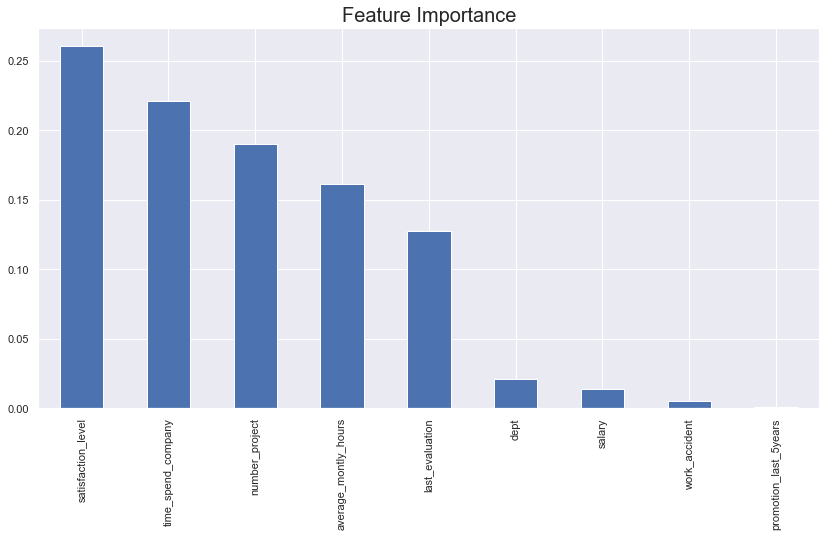

In [31]:
#feature importance to show the features that affect the target value using the random forest model
feature_importance = pd.Series(rfc.feature_importances_,index=X.columns)
plt.figure(figsize=(14,7))
feature_importance = feature_importance.nlargest(9)
feature_importance.plot(kind='bar')
plt.title('Feature Importance', fontsize=20)
plt.savefig('FeatureImportance.png', bbox_inches='tight')

### From the plot the top 3 features that have importance in the random forest model are satisfaction level, time spent in company, number of projects

# Step 5. Determine the employees that are prone to leave next uaing Random Forest Model

In [32]:
#dividing dataset into independent (X) variables and dependent (Y) variables
# X = employee.iloc[:, 1:-1]
X = employee.drop(['attrition'],axis=1)
y = employee['attrition']

#spliting the dataset to train and test set using 30% of data for the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

#fitting random forest model to training set

rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(X_train.drop('emp_id',axis=1), y_train)
y_pred_rfc = rfc.predict(X_test.drop('emp_id', axis=1))

# accuracy for random forest model
accuracy_rfc = rfc.score(X_test.drop('emp_id', axis=1), y_test)

# Confusion Matrix for random forest
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

print('The accuracy for random forest model on the dataset is ', accuracy_rfc)
print('The confusion matrix for random forest :')
print(cm_rfc)



The accuracy for random forest model on the dataset is  0.9893333333333333
The confusion matrix for random forest :
[[3466    6]
 [  42  986]]


In [38]:
# Finding employees who are prone to leave from employees that still exist

test_set = pd.concat([y_test,X_test], axis=1)
y_pred = pd.DataFrame(y_pred_rfc) #change the predicted variable from array to a dataframe

y_pred.reset_index(inplace=True, drop=True) 

prediction = pd.concat([test.reset_index(),y_pred], axis = 1) #merge the test set and the predicted variables

Emp = prediction[prediction.attrition==0] #store all the employees that still exist in variable emp
Emp = Emp.drop('index', axis=1)

Emp.columns=['attrition','emp_id','PredictedAttrition'] #change the column names

Employees_prone_to_leave=Emp[Emp['PredictedAttrition']==1] #store employees that were predicted to leave by the model but still exist
Employees_prone_to_leave=Employees_prone_to_leave.reset_index()
Employees_prone_to_leave=Employees_prone_to_leave.drop(['attrition','PredictedAttrition','index'],axis=1) #remove all features except employee id
Employees_prone_to_leave #employees that are predicted to leave in the future.

,emp_id
0,9914
1,3596
2,7078
3,7005
4,6743
5,14192


In [41]:
#Details of employees that were predicted to leave
emp_prone_to leave_details = pd.merge(Employees_prone_to_leave, employee, how='inner', on='emp_id')
emp_prone_to leave_details 

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,attrition
0,9914,0.42,0.58,2,140,3,0,0,0,1,0
1,3596,0.32,0.97,6,272,2,0,0,7,1,0
2,7078,0.90,0.85,4,279,6,0,0,8,2,0
3,7005,0.85,0.87,6,232,6,0,0,9,1,0
4,6743,0.35,0.64,4,147,2,0,0,7,1,0
5,14192,0.79,0.87,4,223,5,0,0,7,2,0
